In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file = "cleanedfinalbeerdata.csv"
beer_df = pd.read_csv(file)

In [3]:

beer_sample = beer_df.sample(n=2500)
beer_sample['createDateF'] = pd.to_datetime(beer_sample['createDate']).dt.strftime('%Y%m%d').astype(float)
origin_df = beer_sample.loc[beer_sample['createDateF'] > 20120830]
origin_df.head()

,Unnamed: 0,id,name,description,abv,styleId,id.1,name.1,shortName,description.1,id.2,BJCP Category name,isOrganic,createDate,ibu,srmId,originalGravity,Availability,Availability description,createDateF
21627,21627,MkFM9S,Nina Wit,A classic Witbier (Belgian style wheat ale). I...,10.0,65.0,65.0,Belgian-Style White (or Wit) / Belgian-Style W...,Witbier,Belgian white ales are very pale in color and ...,5.0,Belgian And French Origin Ales,N,6/8/2015 14:28,4.8,NaN,NaN,Limited,Limited availability.,20150608.0
6337,6337,Fv25oO,James Squire - The Hop Father,Rich bodied ale pairs Australian malts with ho...,5.0,74.0,74.0,Australian-Style Pale Ale,Austrailian Pale,Australian-Style Pale Ales are light amber to ...,6.0,International Ale Styles,N,2/25/2017 10:56,35.0,NaN,NaN,NaN,NaN,20170225.0
3837,3837,insc5j,PYNK,Yards proudly donates $1 from every case sold ...,5.5,119.0,119.0,Fruit Beer,Fruit Beer,Fruit beers are any beers using fruit or fruit...,11.0,Hybrid/mixed Beer,N,6/3/2014 12:11,6.0,NaN,NaN,Seasonal,"Available at the same time of year, every year.",20140603.0
29862,29862,Ey972v,Griffith J Griffith,Imperial Stout with Ethiopian Yirga Cheffe Kor...,10.5,43.0,43.0,American-Style Imperial Stout,American Imperial Stout,"Black in color, American-style imperial stouts...",3.0,North American Origin Ales,N,2/10/2015 20:26,NaN,NaN,NaN,NaN,NaN,20150210.0
32956,32956,hoIaxp,War Bird,NaN,4.5,72.0,72.0,French & Belgian-Style Saison,Saison,Beers in this category are golden to deep ambe...,5.0,Belgian And French Origin Ales,N,12/6/2015 15:08,NaN,NaN,NaN,NaN,NaN,20151206.0


In [3]:
descs = beer_df["description"]
descs.head()

0    Our new lower alcohol Ginger Beer marks an exc...
1    Refreshingly Lemony, beautifully mild and even...
2                                                  NaN
3                                                  NaN
4    Beer mixed drink made ​​of 50% and 50% Apoldae...
Name: description, dtype: object

           Frequency
Word                
beer           10077
ale             6972
brewed          5521
hop             5046
malt            4821
hops            4683
’               3167
american        2929
ipa             2920
flavor          2905
pale            2880
dark            2764
light           2376
.               2319
style           2308
notes           2238
dry             2228
flavors         2197
aroma           2129
hops.           2075
aged            2044
finish.         2000
stout           1972
'               1912
wheat           1906
citrus          1905
belgian         1846
chocolate       1806
sweet           1789
beer.           1771
...              ...
barrel           774
white            770
medium           762
aroma.           760
special          758
take             756
enjoy            756
beers            753
ale,             739
tart             734
two              730
yet              724
old              703
using            697
best         

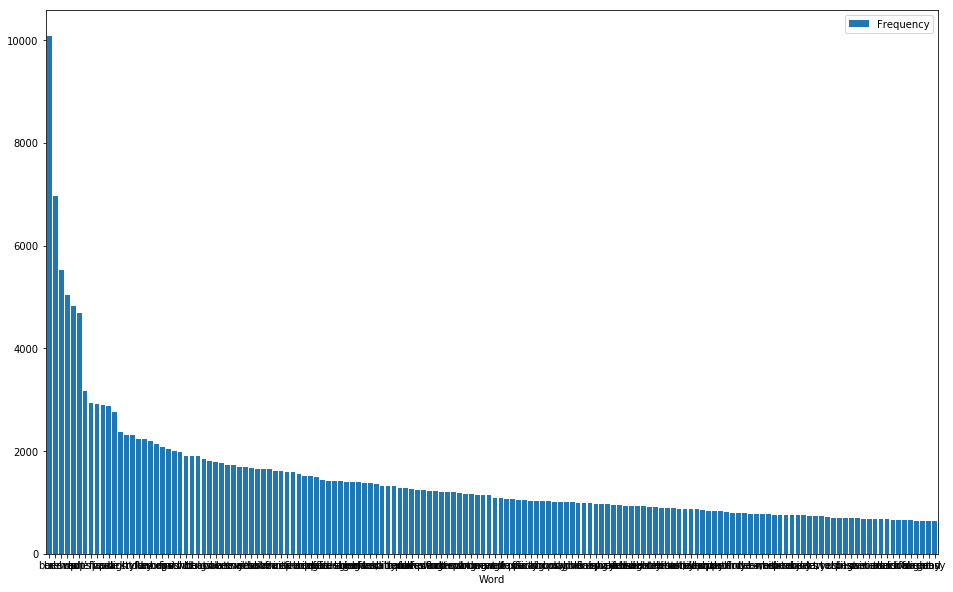

In [32]:
from collections import Counter
import nltk

top_N = 150

dfnltk = pd.read_csv(r'cleanedfinalbeerdata.csv',
                 usecols=['description'])

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (dfnltk.description
           .str.lower()
           .replace([r'\|,', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
wordcountthing = rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)
rslt.to_csv('wordcount.csv')

In [7]:
# Count of Beer Styles
bjcp_df = beer_df.groupby(['BJCP Category name']).count()
category_df = beer_df.groupby(['shortName']).count()
bjcpsorted_df = bjcp_df.sort_values("id", ascending=False)
categorysorted_df = category_df.sort_values("id", ascending=False)
category1 = pd.DataFrame(data=categorysorted_df['id'])

bjcp = list(bjcpsorted_df.index)
bjcp


['North American Origin Ales',
 'Belgian And French Origin Ales',
 'Hybrid/mixed Beer',
 'British Origin Ales',
 'Mead, Cider, & Perry',
 'European-germanic Lager',
 'German Origin Ales',
 'North American Lager',
 'Irish Origin Ales',
 'Other Lager',
 'Malternative Beverages',
 'International Styles',
 'International Ale Styles',
 'Other Origin']

In [8]:
#bjcp_df = beer_df.groupby(['BJCP Category name']).mean()
mean_df = beer_df.groupby(['shortName']).mean()
#bjcpsorted_df = bjcp_df.sort_values("id", ascending=False)
abv_df = pd.DataFrame(data=mean_df['abv'])
ibu_df = pd.DataFrame(data=mean_df['ibu'])
srm_df = pd.DataFrame(data=mean_df['srmId'])
density_df = pd.DataFrame(data=mean_df['originalGravity'])



In [29]:
# merge1 = category1.merge('abv_df', on='shortName', how='outer')
# merge2 = merge1.merge('ibu_df', on='shortName', how='outer')
# merge3 = merge2.merge('srm_df', on='shortName', how='outer')
# merge4 = merge3.merge('density_df', on='shortName', how='outer')

merge_df = pd.concat([category1, abv_df, ibu_df, srm_df, density_df], axis=1)
exp1 = merge_df.sort_values("srmId", ascending=False).head(25)
exp1.to_csv('beersbySRM.csv')
exp1

C:\Users\Peter\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,id,abv,ibu,srmId,originalGravity
Adambier,2,10.500000,35.000000,41.000000,1.075000
American Imperial Stout,1148,10.406794,60.026126,40.088083,1.111400
German Rye,19,5.763158,19.500000,40.000000,1.046000
British Imperial Stout,251,10.256972,67.925926,39.166667,1.085455
Stout,204,7.742647,43.870370,39.148148,1.071727
Oatmeal Stout,308,6.475649,33.424390,38.800000,1.065048
American Imperial Porter,211,8.936019,45.828571,38.705882,1.080625
Export Stout,82,7.134146,42.511905,38.615385,1.062333
Sweet Stout,406,6.834975,28.803614,38.280000,1.067500
Dry Irish Stout,124,5.169355,35.017857,38.214286,1.051125


In [10]:
# abv = beer_df["abv"]
# ibu = beer_df["ibu"]
# srm = beer_df["srmId"] 
# density = beer_df["originalGravity"] 
# create1 = beer_df["createDate"]

abv = beer_sample["abv"]
abv2 = origin_df["abv"]
ibu = beer_sample["ibu"]
ibu2 = origin_df["ibu"]
srm = beer_sample["srmId"] 
density = beer_sample["originalGravity"] 
create1 = pd.to_datetime(origin_df["createDate"])
create2 = pd.to_numeric(create1)



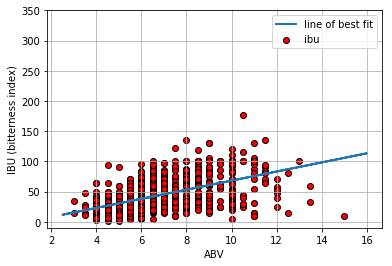

In [11]:
# graphs, ibu, abv, srm, og
from scipy.stats import linregress
import pylab

plt.scatter(abv, ibu, marker="o", facecolors="red", edgecolors="black")
plt.grid(True)
plt.xlabel("ABV")
plt.ylabel("IBU (bitterness index)")
plt.ylim(-10, 350)

#best fit line
mask = ~np.isnan(abv) & ~np.isnan(ibu)
slope1, intercept1, r_value, p_value, std_err = linregress(abv[mask], ibu[mask])

# (slope1, intercept1, _, _, _) = linregress(abv, ibu)
fit1 = slope1 * abv + intercept1
plt.plot(abv, fit1, label="line of best fit", linewidth=2.0)

plt.legend()
plt.show()



In [39]:
from scipy.stats import ttest_ind

(t_stat1, p1) = ttest_ind(abv, ibu, equal_var=False, nan_policy='omit')

print(f"if p value is <= 0.05, then the line of best fit relationship is significantly significant:")
print("ibu as a function of abv: " + str(p1))


if p value is <= 0.05, then the line of best fit relationship is significantly significant:
ibu as a function of abv: 7.287244027868773e-89


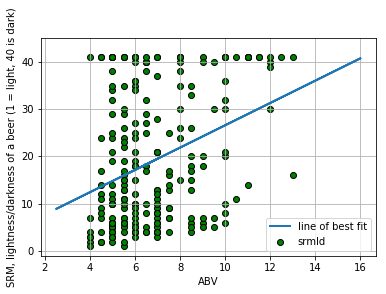

In [12]:
plt.scatter(abv, srm, marker="o", facecolors="green", edgecolors="black")
plt.grid(True)
plt.xlabel("ABV")
plt.ylabel("SRM, lightness/darkness of a beer (1 = light, 40 is dark)")
plt.ylim(-1, 45)


#best fit line
mask = ~np.isnan(abv) & ~np.isnan(srm)
slope2, intercept2, r_value, p_value, std_err = linregress(abv[mask], srm[mask])

# (slope1, intercept1, _, _, _) = linregress(abv, ibu)
fit2 = slope2 * abv + intercept2
plt.plot(abv, fit2, label="line of best fit", linewidth=2.0)

plt.legend()
plt.show()

In [41]:
(t_stat2, p2) = ttest_ind(abv, srm, equal_var=False, nan_policy='omit')

print(f"if p value is <= 0.05, then the line of best fit relationship is significantly significant:")
print("ibu as a function of abv: " + str(p2))


if p value is <= 0.05, then the line of best fit relationship is significantly significant:
ibu as a function of abv: 1.311791301141106e-10


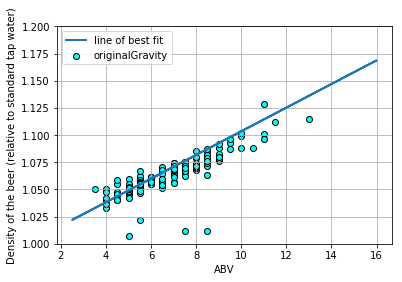

In [14]:
plt.scatter(abv, density, marker="o", facecolors="cyan", edgecolors="black")
plt.grid(True)
plt.xlabel("ABV")
plt.ylabel("Density of the beer (relative to standard tap water)")
plt.ylim(1, 1.2)


#best fit line
mask = ~np.isnan(abv) & ~np.isnan(density)
slope3, intercept3, r_value, p_value, std_err = linregress(abv[mask], density[mask])

# (slope1, intercept1, _, _, _) = linregress(abv, ibu)
fit3 = slope3 * abv + intercept3
plt.plot(abv, fit3, label="line of best fit", linewidth=2.0)

plt.legend()
plt.show()

In [43]:
(t_stat3, p3) = ttest_ind(abv, density, equal_var=False, nan_policy='omit')

print(f"if p value is <= 0.05, then the line of best fit relationship is significantly significant:")
print("ibu as a function of abv: " + str(p3))

if p value is <= 0.05, then the line of best fit relationship is significantly significant:
ibu as a function of abv: 0.0


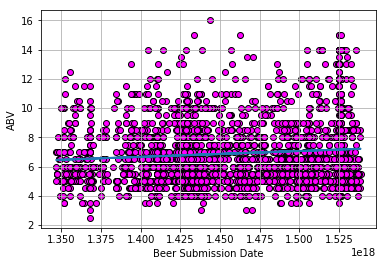

In [15]:
# import matplotlib.dates as mdates

# # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
# # plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# plt.plot_date(x=create2, y=abv, marker='o')
# plt.gcf().autofmt_xdate()

plt.scatter(create2, abv2, marker="o", facecolors="magenta", edgecolors="black")
plt.grid(True)
plt.xlabel("Beer Submission Date")
plt.ylabel("ABV")

mask = ~np.isnan(create2) & ~np.isnan(abv2)
slope4, intercept4, r_value, p_value, std_err = linregress(create2[mask], abv2[mask])

(slope4, intercept4, _, _, _) = linregress(create2, abv2)
fit4 = slope4 * create2 + intercept4
plt.plot(create2, fit4, label="line of best fit", linewidth=2.0)

# plt.xlim(20120801, 20181130)

# best fit line

# plt.plot(np.unique(create2), np.poly1d(np.polyfit(create2, abv, 1))(np.unique(create2)))




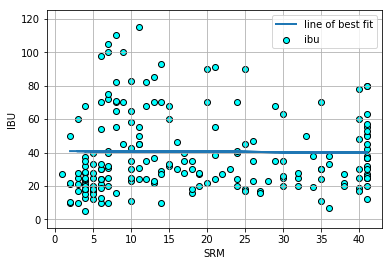

In [21]:
plt.scatter(srm, ibu, marker="o", facecolors="cyan", edgecolors="black")
plt.grid(True)
plt.xlabel("SRM")
plt.ylabel("IBU")
plt.ylim(-5, 125)


#best fit line
mask = ~np.isnan(srm) & ~np.isnan(ibu)
slope5, intercept5, r_value, p_value, std_err = linregress(srm[mask], ibu[mask])

# (slope1, intercept1, _, _, _) = linregress(abv, ibu)
fit5 = slope5 * srm + intercept5
plt.plot(srm, fit5, label="line of best fit", linewidth=2.0)

plt.legend()
plt.show()

In [45]:
(t_stat5, p5) = ttest_ind(srm, ibu, equal_var=False, nan_policy='omit')

print(f"if p value is <= 0.05, then the line of best fit relationship is significantly significant:")
print("ibu as a function of abv: " + str(p5))

if p value is <= 0.05, then the line of best fit relationship is significantly significant:
ibu as a function of abv: 2.9030633914028174e-30


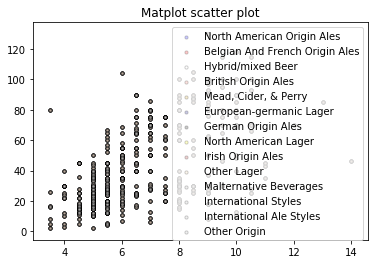

In [55]:
colors = ("blue", "red", "white", "salmon", "goldenrod", "navy", "black", "yellow", "firebrick", "wheat", "silver", "silver", "silver", "silver")
groups = bjcp
 
# Create plot


 
for color, group in zip(colors, groups):
    plt.scatter(abv, ibu, alpha=0.2, c=color, edgecolors='black', s=10, label=group)
 
plt.title('Matplot scatter plot')
plt.legend()
plt.show()

In [ ]:
['North American Origin Ales',
 'Belgian And French Origin Ales',
 'Hybrid/mixed Beer',
 'British Origin Ales',
 'Mead, Cider, & Perry',
 'European-germanic Lager',
 'German Origin Ales',
 'North American Lager',
 'Irish Origin Ales',
 'Other Lager',
 'Malternative Beverages',
 'International Styles',
 'International Ale Styles',
 'Other Origin']

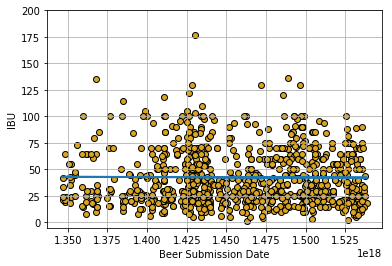

In [19]:
# import matplotlib.dates as mdates

# # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
# # plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# plt.plot_date(x=create2, y=abv, marker='o')
# plt.gcf().autofmt_xdate()

plt.scatter(create2, ibu2, marker="o", facecolors="goldenrod", edgecolors="black")
plt.grid(True)
plt.xlabel("Beer Submission Date")
plt.ylabel("IBU")
plt.ylim(-5, 200)

mask = ~np.isnan(create2) & ~np.isnan(ibu2)
slope4, intercept4, r_value, p_value, std_err = linregress(create2[mask], ibu2[mask])

#(slope4, intercept4, _, _, _) = linregress(create2, ibu2)
fit4 = slope4 * create2 + intercept4
plt.plot(create2, fit4, label="line of best fit", linewidth=2.0)

# plt.xlim(20120801, 20181130)

# best fit line

# plt.plot(np.unique(create2), np.poly1d(np.polyfit(create2, abv, 1))(np.unique(create2)))